In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import math
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

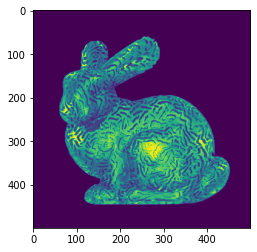

(500, 499)


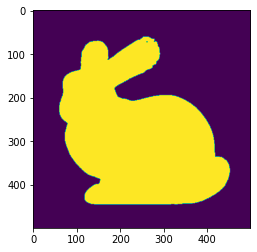

a_t: (500, 499)
g_t: (500, 499, 3)


In [2]:
a_t=img.imread('BUNNY.001.png')[:,:,0]
g_t=img.imread('BUNNY.001.png')[:,:,:3]
plt.imshow(a_t)
plt.show()
print(a_t.shape)
for i in range(len(a_t[0])):
  for j in range(len(a_t[1])):
    if a_t[i][j]!=0:
      a_t[i][j]=(a_t[i][j]-a_t[i][j])+255.0
plt.imshow(a_t)
plt.show()
print("a_t:",a_t.shape)
print("g_t:",g_t.shape)

In [3]:
def load_target(frame):

    # target_file="/content/golem.001_.png"   
    target_file='/content/golem.0'+str(frame)+'.png'
    G_T = img.imread(target_file)[:,:,: 3]
    A_T = img.imread(target_file)[:,:,3]
    plt.imshow(G_T)
    plt.show()

    plt.imshow(A_T)

    print(A_T.shape)
    return G_T,A_T

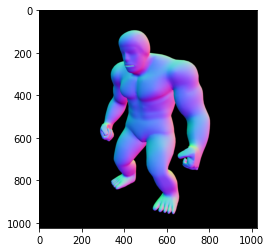

(1024, 1024)


(1024, 1024, 3)

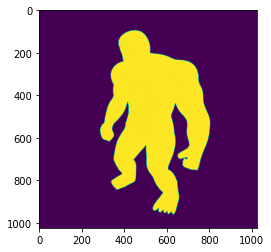

In [ ]:
# g_t,a_t= load_target('01')
# g_t.shape

In [ ]:
# load_target('01')

In [4]:
def position_features(h,w):
  print("h:",h)
  print("w:",w)

  x = np.arange(1,w+1) 
  print("x: ",x)
  y = np.arange(1,h+1) 
  print("y: ",y)

  X,Y = np.meshgrid(x,y)
  

  print("X: ",X)
  print("Y: ",Y)
  
  P=np.dstack((Y, np.atleast_3d(X)))
  # P=np.concatenate((Y, X), axis = 0).reshape((len(Y),len(Y[0]),-1))
  print("P: ",P)

  scaler = math.sqrt(w*h);
  P = P / scaler;


  return P, scaler

In [5]:
h,w = g_t.shape[:2]
P, scaler = position_features(h,w)
print(P.shape)

h: 500
w: 499
x:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 

In [6]:
# P[0:11,0:11,0]

In [7]:
def region_of_interest(A_X,X):
  roi = []
  idx=[]
  for i in range(len(A_X)):
    if(A_X[i]>0.0):
      roi.append(X[i,:])
      idx.append(i)
  # print("roi:",roi)
  return np.array(roi),np.array(idx)
  

In [8]:
def x_region_of_interest(x_roi,sample_ids):
  roi1 = [] 
  for i in sample_ids:
    roi1.append(x_roi[i])
  return roi1

In [9]:
import random
def randint(num_roi, num_samples):
  beg=1
  end=num_roi
  arr=[]
  for i in range(num_samples+1):
    arr.append(random.randint(beg, end))
  return arr

In [10]:
def knnsearch(C,X):
  dist = []
  index = []
  for i in X:
    list1 = []
    list2 = []
    for j in C:
      #Euclidean distance
      list1.append(math.sqrt((i[0]-j[0])**2+(i[1]-j[1])**2+(i[2]-j[2])**2+(i[3]-j[3])**2+(i[4]-j[4])**2))
    # print(list1)
    index.append(list1.index(min(list1)))
    dist.append(min(list1))
  return index

In [11]:
# def fs(g_t,a_t,k):
#   sample_per_cluster = 32
#   h,w = g_t.shape[:2]
#   P, scalar = position_features(h,w)

#   w_p = 4.0
#   print("hello")
#   X=np.dstack((g_t, w_p*P))
#   # X=np.concatenate((g_t, w_p*P), axis = 2)
#   # print("X: ",X)
#   # print("X:",X.shape)
#   # print(X[0:10,0:10,0])
#   X = np.reshape(X, (h*w,-1))
#   return X

In [12]:
# o=fs(g_t,a_t,200)

In [13]:
# h=np.reshape(o,(1024,1024,5))
# plt.imshow(h[:,:,4])

In [14]:
def feature_selection(g_t, a_t, k):
  sample_per_cluster = 32
  h,w = g_t.shape[:2]
  P, scalar = position_features(h,w)

  w_p = 4.0
  print("hello")
  X=np.dstack((g_t, w_p*P))
  # X=np.concatenate((g_t, w_p*P), axis = 2)
  # print("X: ",X)
  # print("X:",X.shape)
  # print(X[0:10,0:10,0])
  X = np.reshape(X, (h*w,-1))
  print("X:",X.shape)
  # print(X[0:10,:])
  A_X = np.reshape(a_t, (h*w,-1))
  print("A_X:",A_X.shape)
  # print(A_X[0:10,:])
  x_roi,index = region_of_interest(A_X,X)
  # print(x_roi[0:10,:])
  # print(index[0:10])
 
  print("x_roi:",x_roi.shape)
  num_roi = len(x_roi)
  num_samples = sample_per_cluster * k     #6400
  num_samples = min(num_samples, num_roi)  #6400

  sample_ids = randint(num_roi, num_samples)
  x_samples = x_region_of_interest(x_roi,sample_ids)
  print("x_samples:",np.asarray(x_samples).shape)

  kmeans = KMeans(n_clusters=k, random_state=0).fit(x_samples) #fit(X)
  C=kmeans.cluster_centers_
  L=kmeans.labels_


  # idx = knnsearch(C, X)
  # idx1=knnsearch(C,x_roi)
  idx=knnsearch(C,X)

  idx=np.asarray(idx)
  print("idx:",idx.shape)

  rendering_index=idx #for rendering function
  print("rendering_idx:",rendering_index.shape)

  G_c = []
  for i in idx:
    G_c.append(C[i,0:3])
  G_c = np.asarray(G_c)
  print("G_c shape:",G_c.shape)

  G_c = np.reshape(G_c, (h,w,-1))
  print("G_c reshaped:",G_c.shape)

  P_c = []
  for i in idx:
    P_c.append(C[i,3:5])
  
  P_c = np.asarray(P_c)

  P_c = scaler * P_c / w_p

  P_c = np.reshape(P_c, (h,w,-1))
  print("P_c shape:" , P_c.shape)

  idx = np.reshape(idx,(h,w))

  return idx,G_c, P_c,C,A_X,x_roi,rendering_index,X,L #,idx1

In [15]:
idx,G_c,P_c,C,A_X,x_roi,rendering_index,X,L = feature_selection(g_t,a_t,200) #idx1

h: 500
w: 499
x:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 

In [16]:
# print(L.shape)
# # lo=np.asarray(L[0:6400])
# # print(lo.shape)
# plt.imshow(np.reshape(L,(a_t.shape[0],a_t.shape[1])))
# # plt.show()
# # np.reshape(lo,(80,80))

In [17]:
plt.imshow(idx)


In [18]:
 # X=[[1,2,3,4,5],[6,7,8,9,0]]
def rendering_collection_dictionary(C,X,id):
    dictionary={}
   
    for i in range(len(id)): #cluster index / centroid index 
      if id[i] not in dictionary: #id[i] is cluster number/cluster index
        dictionary[id[i]]=[X[i]]
        dictionary[id[i]].append(C[id[i]])
      elif id[i] in dictionary:
        dictionary[id[i]].append(X[i])
    
    return dictionary

    #dictionary ={"cluter number": [[1,2,3,4,5],[6,7,8,9,0],[11,12,13,14,15]]}


dic=rendering_collection_dictionary(C,X,rendering_index)   


In [19]:
# t=np.reshape(X,(1024,1024,-1))
# z=np.dstack((idx,t[:,:,:3]))

In [20]:
C

array([[0.4404706 , 0.41121569, 0.12470589, 1.41245316, 0.69893929],
       [0.67607845, 0.6447059 , 0.21215687, 2.3335347 , 2.1973985 ],
       [0.34067047, 0.31321949, 0.08349146, 3.13862407, 3.03400326],
       [0.25306373, 0.22377452, 0.04411765, 3.25300463, 1.94694792],
       [0.62650442, 0.59215688, 0.20473293, 1.08356687, 1.86807591],
       [0.4914566 , 0.46400561, 0.13319328, 2.42757164, 0.68697303],
       [0.59502265, 0.56244346, 0.17677225, 2.02710504, 3.02518054],
       [0.46728587, 0.44375646, 0.14220847, 1.80011681, 1.87787882],
       [0.50187736, 0.48251983, 0.16987902, 1.03269278, 1.06625828],
       [0.67379681, 0.63672016, 0.16443851, 3.44617517, 2.42515364],
       [0.29784315, 0.27303922, 0.07009804, 1.82662754, 1.1309315 ],
       [0.68359135, 0.67368423, 0.27244583, 2.93472567, 1.01280278],
       [0.50686276, 0.48529413, 0.17320262, 3.06673494, 1.42342414],
       [0.39366516, 0.33966818, 0.05067873, 2.56564385, 1.91699488],
       [0.76606992, 0.72259166, 0.

In [21]:
# plt.imshow(t[:,:,:3])
def removing_outside_cluster_pixels_from_C(C):
  C_model_leaving_outside_centroid_pixel=np.asarray(C)
  list_outside_cluster_nos=[]
  for i in range(idx.shape[0]):
    for j in range(idx.shape[1]):
      if a_t[i][j]==0:
        if idx[i][j] not in list_outside_cluster_nos:
          list_outside_cluster_nos.append(idx[i][j])
        

  print(len(list_outside_cluster_nos))
  for i in list_outside_cluster_nos:
    C_model_leaving_outside_centroid_pixel[i]=[-2147483647.0,-2147483647.0,-2147483647.0,-2147483647.0,-2147483647.0]#[0,0,0,0,0] #C_model_leaving_outside_centroid_pixel

  # for j in C_model_leaving_outside_centroid_pixel:
  #   if [0,0,0,0,0] not in j:
  #     C_final.append(j)
  return C_model_leaving_outside_centroid_pixel,list_outside_cluster_nos







In [22]:
# C_final,list_outside_cluster_nos=removing_outside_cluster_pixels_from_C(C)
# print(len(C_final))
# C_final[2]

In [23]:
# h=np.array([[1,2,3],[4,1,1],[1,2,3],[5,6,7]])
# e=[]
# # np.delete(h,np.where(h==[1,2,3]),axis=1)
# for j in h:
# #   if h[j]==[1,2,3]:
# #     print("true")
#   if [1,2,3] in j:
#     print("false")
#   elif [1,2,3] not in j:
#     print("true")
#     e.append(j)
# # if [1,2,3] in h:
# #   print("True")
# e

In [24]:
# h=np.array([[1,2,3],[4,1,1],[1,2,3]])
# for i in h:
#   if i==[1,2,3]:
#     np.delete()
# # z=np.delete(h,np.where(h==[1,2,3],axis=0))
# np.where(h==[1,2,3])

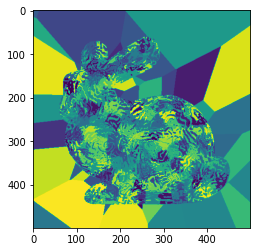

In [25]:
plt.imshow(idx)

In [26]:
# np.array(idx1).shape

In [27]:
print(idx.shape)
print(idx)

(500, 499)
[[ 57  57  57 ... 108 108 108]
 [ 57  57  57 ... 108 108 108]
 [ 57  57  57 ... 108 108 108]
 ...
 [ 79  79  79 ... 134 134 134]
 [ 79  79  79 ... 134 134 134]
 [ 79  79  79 ... 134 134 134]]


In [28]:
G_C_USE=np.array(G_c)
# h=img.imread("02.png")
# c_s=np.array(h)
c_s = img.imread("01.png")[:,:,:3]
a_s = img.imread("01.png")[:,:,3]
# from skimage.filters import gaussian
# c_s=gaussian(c_s_o, sigma=50,mode = 'nearest',truncate=2.0)

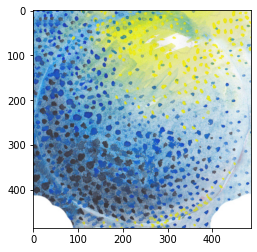

In [29]:
plt.imshow(c_s)

In [30]:
# print(idx) #1024 x 1024 
#c_s #486 x 486 x 3

#correct
def rendering(c_s,G_c,a_t):
  G_C_USE=np.array(G_c)
  dict1={} # {"int(group_no.)":[i-coordinate]}
  dict2={} # {"int(group_no.)":[j-cordinate]}

  for i in range(0,idx.shape[0]):
    for j in range(0,idx.shape[1]):
      if idx[i][j] not in dict1:
        dict1[idx[i][j]]=[]
        dict2[idx[i][j]]=[]
      dict1[idx[i][j]].append(i)
      dict2[idx[i][j]].append(j)

  min_i=[]
  min_j=[]
  max_i=[]
  max_j=[]
  len_c_s=c_s.shape[0]
  breadth_c_s=c_s.shape[1]

  random_pt_i=[]
  random_pt_j=[]

  is_point_valid=[]

  for u in range(0,200):
    min_i.append(min(dict1[u]))
    min_j.append(min(dict2[u]))
    max_i.append(max(dict1[u]))
    max_j.append(max(dict2[u]))
  

    u_len_i=max_i[u]-min_i[u]
    u_len_j=max_j[u]-min_j[u]

    max_ref_i = max(len_c_s - u_len_i,0)
    max_ref_j = max(breadth_c_s - u_len_j,0)
    
    if max_ref_i==0 or max_ref_j==0:
      is_point_valid.append(0)
      max_ref_i+=1
      max_ref_j+=1
    else:
      is_point_valid.append(1) 
    
    ###  
    
    
    random_point_i=np.random.randint(0,max_ref_i)
    random_point_j=np.random.randint(0,max_ref_j)
    random_pt_i.append(random_point_i)
    random_pt_j.append(random_point_j)

    ###
    
  ctr=0
  for i in range(0,idx.shape[0]):
    for j in range(0,idx.shape[1]):
      grp=idx[i][j]
      if a_t[i][j]==0 or is_point_valid[grp]==0:
        # print(i,j)
        continue

      ctr+=1
      
      a=random_pt_i[grp] + (i-min_i[grp])
      b=random_pt_j[grp] + (j-min_j[grp])

      
      
      G_C_USE[i][j][0]=c_s[a][b][0] #cv2.bitwise_and(np.asarray([255.0]),np.asarray(c_s[a][b][0]))[0][0]
      G_C_USE[i][j][1]=c_s[a][b][1] #cv2.bitwise_and(np.asarray([255.0]),np.asarray(c_s[a][b][1]))[0][0]
      G_C_USE[i][j][2]=c_s[a][b][2] #cv2.bitwise_and(np.asarray([255.0]),np.asarray(c_s[a][b][2]))[0][0]

      
      # G_C_USE[i][j][1]=G_C_USE[i][j][0] & c_s[a][b][0]
      # G_C_USE[i][j][1]=G_C_USE[i][j][1] & c_s[a][b][1]
      # G_C_USE[i][j][2]=G_C_USE[i][j][2] & c_s[a][b][2]

  
  print(ctr)
  return G_C_USE

In [31]:
g_c_use=rendering(c_s,G_c,a_t)

97204


In [33]:
a_t=a_t/255.0

(500, 499, 3)
(500, 499, 3)


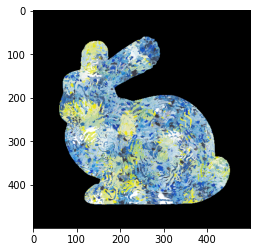

In [36]:
import cv2

from google.colab.patches import cv2_imshow

p=np.dstack((a_t,a_t))
pq=np.dstack((p,a_t))

plt.imsave('pq.png', pq)
plt.imsave("G_C_RENDERED_TEXTURED_MODEL_BUNNY.png",g_c_use)
image1_render = cv2.imread('pq.png')
image2_render = cv2.imread('/content/G_C_RENDERED_TEXTURED_MODEL_BUNNY.png')
# cv2_imshow(image1_render)
# cv2_imshow(image2_render)
print(image1_render.shape)
print(image2_render.shape)
final_rendered_image=cv2.bitwise_and(image1_render,image2_render)
# cv2_imshow(final_rendered_image)
cv2.imwrite("finally_redndering_model_bunny.png", final_rendered_image)
finally_redndering_model=img.imread("finally_redndering_model_bunny.png")
plt.imshow(finally_redndering_model)

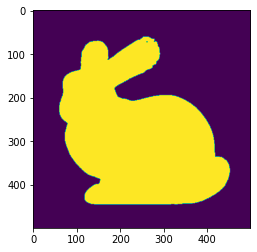

In [ ]:
# plt.imshow(a_t)

In [ ]:
# c_s.shape

(486, 486, 3)

In [ ]:
# plt.imshow(g_t)

In [ ]:
# r=np.reshape(g_t,(g_t.shape[0]*g_t.shape[1],-1))
# print(r.shape)
# kmeans_g = KMeans(n_clusters=200, random_state=0).fit(r)

In [ ]:
# Labels_g_t=kmeans_g.labels_
# plt.imshow(np.reshape(Labels_g_t,(g_t.shape[0],g_t.shape[1])))

In [ ]:
def clustering_of_texture(c_s,k):
    c_s_=np.reshape(c_s,(c_s.shape[0]*c_s.shape[1],-1))
    kmeans_texture = KMeans(n_clusters=k, random_state=0).fit(c_s_)
    C_texture=kmeans_texture.cluster_centers_
    Labels_texture=kmeans_texture.labels_
    # id = knnsearch(C_texture,c_s)
    return C_texture,Labels_texture

      
##base layer k clusters 

In [ ]:
C_text,Labels_text=clustering_of_texture(c_s,183)

In [ ]:
# print(Labels_text.shape)
# # labels = Labels_text.flatten()
# segmented_image = C_text[Labels_text]

In [ ]:
C_text[0]

array([0.91251886, 0.9411622 , 0.9304644 ], dtype=float32)

In [ ]:
# labels=np.reshape(Labels_text,(c_s.shape[0],c_s.shape[1]))

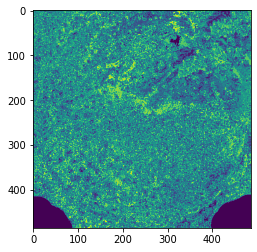

In [ ]:
# hi=np.reshape(Labels_text,(c_s.shape[0].c_s.shape[1]))
plt.imshow(np.reshape(Labels_text,(c_s.shape[0],c_s.shape[1])))

In [ ]:
# np.reshape(Labels_text,(c_s.shape[0],c_s.shape[1]))

In [ ]:
# c_s.shape

In [ ]:
# segmented_image=np.reshape(segmented_image,(c_s.shape[0],c_s.shape[1],3))

In [ ]:
# plt.imshow(segmented_image)

In [ ]:
# plt.imshow(segmented_image)

In [ ]:
# c_s_1[0]

In [ ]:
# q=C_text[0:3]
# for c in q:
#   print(c[0])

# # C_text

In [ ]:

# # c_s_1=np.reshape(c_s,(c_s.shape[0]*c_s.shape[1],-1))
# l=[]
# for i in range(1):
#   l.append(c_s[0,0,:])
#   l.append(c_s[1,1,:])

# l[0]


In [ ]:
# C_text[0]

In [ ]:
##centroid_texture locations

def centroid_indexes(C_text,c_s):

  dic1_i_text={} #{"centroid":i}
  dic2_j_text={} #{"centroid":j}
  list4_dist=[]
  new_centroid_i=[]
  new_centroid_j=[]
  new_centroid_values=[]

  for c in C_text: 
    new_centroid_dist=np.zeros((c_s.shape[0],c_s.shape[1]))
    for i in range(0,c_s.shape[0]):
      for j in range(0,c_s.shape[1]):
        dist=math.sqrt((c[0]-c_s[i][j][0])**2+(c[1]-c_s[i][j][1])**2+(c[2]-c_s[i][j][2])**2)
        new_centroid_dist[i][j]=dist

    new_centroid_dist=np.asarray(new_centroid_dist)
    h=np.where(new_centroid_dist==np.amin(new_centroid_dist))
    new_centroid_i.append(h[0][0])
    new_centroid_j.append(h[1][0])
    new_centroid_values.append(c_s[h[0][0],h[1][0],:])

  return new_centroid_i,new_centroid_j,new_centroid_values

      # list4_dist.append(math.sqrt((c[0]-c_s[i][j][0])**2+(c[1]-c_s[i][j][1])**2+(c[2]-c_s[i][j][2])**2))
  


In [ ]:
# a=np.array([[100,20,30],[45,5,6]])
# # print(6 in a)
# h=np.where(a == np.amin(a))
# h
# # np.amin(a)

In [ ]:
def nearest_centroid_to_pixel(new_centroid_values,y):
   list3=[]
   for j in new_centroid_values:
      #Euclidean distance
      list3.append(math.sqrt((y[0]-j[0])**2+(y[1]-j[1])**2+(y[2]-j[2])**2))
      
   centroid_no=list3.index(min(list3))
   return centroid_no # ,new_centroid_values[id]
    # index.append(list1.index(min(list1)))

In [ ]:
def find_next_nearest_centroid_model(C,y):
  list3=[]
  for j in C:
    list3.append(math.sqrt((y[0]-j[0])**2+(y[1]-j[1])**2+(y[2]-j[2])**2+(y[3]-j[3])**2+(y[4]-j[4])**2))
  
  next_nearest_centroid_no_model=list3.index(min(list3))
  return next_nearest_centroid_no_model

In [ ]:
def find_next_nearest_centroid_style(new_centroid_values,y):
  list3=[]
  for j in new_centroid_values:
    list3.append(math.sqrt((y[0]-j[0])**2+(y[1]-j[1])**2+(y[2]-j[2])**2))
  
  next_nearest_centroid_no_style=list3.index(min(list3))
  return next_nearest_centroid_no_style


In [ ]:
# print(idx) #1024 x 1024 
#c_s #486 x 486 x 3

def rendering(C_final,C_text,c_s,G_c,a_t):
  G_C_USE=np.array(G_c)

  dict1={} # {"int(group_no.)":[i-coordinate]}
  dict2={} # {"int(group_no.)":[j-cordinate]}

  for i in range(0,idx.shape[0]):
    for j in range(0,idx.shape[1]):
        if idx[i][j] not in dict1:
          dict1[idx[i][j]]=[]
          dict2[idx[i][j]]=[]
        dict1[idx[i][j]].append(i)
        dict2[idx[i][j]].append(j)

  min_i=[]
  min_j=[]
  max_i=[]
  max_j=[]
  len_c_s=c_s.shape[0]
  breadth_c_s=c_s.shape[1]

  random_pt_i=np.zeros(200) #random_pt_i=np.zeros(200) 
  random_pt_j=np.zeros(200) #random_pt_j=np.zeros(200) 

  is_point_valid=[]

  """
  #for first cluster rendering
  midddle_pixel_i=c_s.shape[0]//2
  midddle_pixel_j=c_s.shape[1]//2
  new_centroid_i,new_centroid_j,new_centroid_values=centroid_indexes(C_text,c_s)
  nearest_Centroid_id=nearest_centroid_to_pixel(new_Centroid_values,c_s[middle_pixel_i,middle_pixel_j,:])


  first_cluster_no_model=#write

  min_i_first=min(dict1[first_cluster_no_model]))
  min_j_first=min(dict2[first_cluster_no_model]))
  max_i_first=max(dict1[first_cluster_no_model]))
  max_j_first=max(dict2[first_cluster_no_model]))

  u_len_i=max_i_first-min_i_first
  u_len_j=max_j_first-min_j_first

  point_i=new_centroid_i[nearest_centroid_id]
  point_j=new_centroid_j[nearest_centroid_id]
  point_pixel_value=new_centroid_values[nearest_centroid_id]


  """

  for u in range(0,200): #for u in range(0,200):
    min_i.append(min(dict1[u]))
    min_j.append(min(dict2[u]))
    max_i.append(max(dict1[u]))
    max_j.append(max(dict2[u]))

  # intitial_cluster_no=50
  new_centroid_i,new_centroid_j,new_centroid_values=centroid_indexes(C_text,c_s) # it stores indexes of each new centroid (0-200)
  
  new_centroid_values_style=np.asarray(new_centroid_values)
  C_model=np.asarray(C_final)
  print("new_centroid_values_style:",new_centroid_values_style.shape)
  print("C_model:",C_model.shape)

  is_centroid_model_covered=np.zeros(98) #is_centroid_model_covered=np.zeros(200)
  is_centroid_style_covered=np.zeros(98) #is_centroid_style_covered=np.zeros(200)

  # outside_cluster_nos=[] ##adding background outside shape clusters which are not in model_shape
  # inside_cluster_nos=[]
  # for p in range(0,idx.shape[0]):
  #   for q in range(0,idx.shape[1]):
  #     if a_t[p][q]==0:
  #       if idx[p][q] not in outside_cluster_nos:
  #         outside_cluster_nos.append(idx[p][q])
  #     else:
  #       if idx[p][q] not in inside_cluster_nos:
  #         inside_cluster_nos.append(idx[p][q])


  for i in range(0,183): #for i in range(0,200):
    
    # if i in outside_cluster_nos:
    #   continue
  # for i in inside_cluster_nos:
  
    if i==0:
      first_index_cluster_no=2
      #starting from middle cluster
      middle_pixel_i=c_s.shape[0]//2
      middle_pixel_j=c_s.shape[1]//2
      # nearest centroid to the middle pixel of style
      centroid_no=nearest_centroid_to_pixel(new_centroid_values,c_s[middle_pixel_i,middle_pixel_j,:]) #50 centroid
      random_point_i=new_centroid_i[centroid_no]
      random_point_j=new_centroid_j[centroid_no]
      random_pt_i[first_index_cluster_no]=random_point_i
      random_pt_j[first_index_cluster_no]=random_point_j

      print("random_point_i_0:",random_point_i)
      print("random_point_j_0:",random_point_j)
      
      is_centroid_model_covered[first_index_cluster_no]=1 #is_centroid_model_covered[0]=1
      is_centroid_style_covered[centroid_no]=1
      C_model_save=C_model[first_index_cluster_no] #C_model_save=C_model[0]
      C_style_save=new_centroid_values_style[centroid_no]

      C_model[first_index_cluster_no]=[2147483647.0,2147483647.0,2147483647.0,2147483647.0,2147483647.0] 
      new_centroid_values_style[centroid_no]=[2147483647.0,2147483647.0,2147483647.0] #np.delete(new_centroid_values,0,axis=0)
      # new_centroid_values=np.delete(new_centroid_values,0,axis=0)
      # C_model=np.delete(C_model,centroid_no,axis=0)
      
      next_nearest_centroid_no_model=find_next_nearest_centroid_model(C_model,C_model_save)
      next_nearest_centroid_no_style=find_next_nearest_centroid_style(new_centroid_values_style,C_style_save)
      
    else:
      # if next_nearest_centroid_no_model in outside_cluster_nos:
      #   random_pt_i[next_nearest_centroid_no_model]=0 #no use in future so any value
      #   random_pt_j[next_nearest_centroid_no_model]=0 #no use in future so any value
      #   continue

      random_point_i=new_centroid_i[next_nearest_centroid_no_style]
      random_point_j=new_centroid_j[next_nearest_centroid_no_style]
      random_pt_i[next_nearest_centroid_no_model]=random_point_i
      random_pt_j[next_nearest_centroid_no_model]=random_point_j
      
      is_centroid_model_covered[next_nearest_centroid_no_model]=1
      is_centroid_style_covered[next_nearest_centroid_no_style]=1
      C_model_save=C_model[next_nearest_centroid_no_model]
      C_style_save=new_centroid_values_style[next_nearest_centroid_no_style]

      C_model[next_nearest_centroid_no_model]=[2147483647.0,2147483647.0,2147483647.0,2147483647.0,2147483647.0] 
      new_centroid_values_style[next_nearest_centroid_no_style]=[2147483647.0,2147483647.0,2147483647.0]

      next_nearest_centroid_no_model=find_next_nearest_centroid_model(C_model,C_model_save)
      next_nearest_centroid_no_style=find_next_nearest_centroid_style(new_centroid_values_style,C_style_save)
      if i==180:
        print("random_point_i_180:",random_point_i)
        print("random_point_j_180:",random_point_j)

  

  a_t_1=np.dstack((a_t,a_t))
  A_T_USE=np.dstack((a_t_1,a_t))
  ctr=0
  # A_T_USE=np.asarray(a_t)
  for i in range(0,idx.shape[0]):
    for j in range(0,idx.shape[1]):
      grp=idx[i][j]
      if a_t[i][j]==0: # or is_point_valid[grp]==0:
        # print(i,j)
        continue

      ctr+=1
      
      a=random_pt_i[grp] + (i-min_i[grp])
      b=random_pt_j[grp] + (j-min_j[grp])
      # if ctr==1 or ctr==0 or ctr==2 or ctr==20:
      # print("a,b:",a,b)
      
      if grp==2:
      # if A_T_USE[i][j][0]==255.0 or A_T_USE[i][j][1] == 255.0 or A_T_USE[i][j][2] == 255.0:
      
        A_T_USE[i][j][0]=c_s[int(a)][int(b)][0] #cv2.bitwise_and(np.asarray([255.0]),np.asarray(c_s[a][b][0]))[0][0]
        A_T_USE[i][j][1]=c_s[int(a)][int(b)][1] #cv2.bitwise_and(np.asarray([255.0]),np.asarray(c_s[a][b][1]))[0][0]
        A_T_USE[i][j][2]=c_s[int(a)][int(b)][2] #cv2.bitwise_and(np.asarray([255.0]),np.asarray(c_s[a][b][2]))[0][0]
      
      # if ctr==25000:
        # return A_T_USE#,G_C_USE
      
      # G_C_USE[i][j][1]=G_C_USE[i][j][0] & c_s[a][b][0]
      # G_C_USE[i][j][1]=G_C_USE[i][j][1] & c_s[a][b][1]
      # G_C_USE[i][j][2]=G_C_USE[i][j][2] & c_s[a][b][2]

  
  print(ctr)
  return A_T_USE #G_C_USE

    



In [ ]:
g_c_use=rendering(C_final,C_text,c_s,G_c,a_t)

new_centroid_values_style: (183, 3)
C_model: (200, 5)
random_point_i_0: 309
random_point_j_0: 319


IndexError: ignored

In [ ]:
print(g_c_use.shape)
plt.imshow(g_c_use)
plt.show()

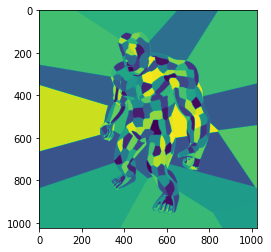

In [ ]:
plt.imshow(idx)

In [ ]:
    is_boolean_model_cluster_no_out_in = np.zeros(200)
  dic={}
  for i in range(idx.shape[0]):
    for j in range(idx.shape[1]):

      if a_t[i][j]==0 :
        # print(idx[i][j])
        is_boolean_model_cluster_no_out_in[idx[i][j]] = 0
      else:
        is_boolean_model_cluster_no_out_in[idx[i][j]] = 1


  is_boolean_model_cluster_no_out_in


Streaming output truncated to the last 5000 lines.
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
139
1

KeyboardInterrupt: ignored

In [ ]:
def nearest_model_and_style_neighbours(C,C_text,min_i,min_j,max_i,max_j):
  is_boolean_model_cluster_no_out_in = np.zeros(200)
  for i in range(idx.shape[0]):
    for j in range(idx.shape[1]):
      if a_t[i][j] != 0: 
        grp=idx[i][j]
        is_boolean_model_cluster_no_out_in[grp] = 1
        
  for i in range(0,200):
    if is_boolean_is_boolean_model_cluster_no_out_in[i]:
      

    

In [ ]:
# import numpy as np
# h=np.asarray([[1,2,3,4],[6,5,7,8],[62,6,7,8]])
# h[0]=[5,5,5,5]
# h

array([[ 5,  5,  5,  5],
       [ 6,  5,  7,  8],
       [62,  6,  7,  8]])

In [ ]:
# print(idx) #1024 x 1024 
#c_s #486 x 486 x 3

#correct
def rendering(c_s,G_c,a_t):
  G_C_USE=np.array(G_c)
  dict1={} # {"int(group_no.)":[i-coordinate]}
  dict2={} # {"int(group_no.)":[j-cordinate]}

  for i in range(0,idx.shape[0]):
    for j in range(0,idx.shape[1]):
      if idx[i][j] not in dict1:
        dict1[idx[i][j]]=[]
        dict2[idx[i][j]]=[]
      dict1[idx[i][j]].append(i)
      dict2[idx[i][j]].append(j)

  min_i=[]
  min_j=[]
  max_i=[]
  max_j=[]
  len_c_s=c_s.shape[0]
  breadth_c_s=c_s.shape[1]

  random_pt_i=[]
  random_pt_j=[]

  is_point_valid=[]

  for u in range(0,200):
    min_i.append(min(dict1[u]))
    min_j.append(min(dict2[u]))
    max_i.append(max(dict1[u]))
    max_j.append(max(dict2[u]))
  

    u_len_i=max_i[u]-min_i[u]
    u_len_j=max_j[u]-min_j[u]

    max_ref_i = max(len_c_s - u_len_i,0)
    max_ref_j = max(breadth_c_s - u_len_j,0)
    
    if max_ref_i==0 or max_ref_j==0:
      is_point_valid.append(0)
      max_ref_i+=1
      max_ref_j+=1
    else:
      is_point_valid.append(1) 
    
    ###  
    
    
    random_point_i=np.random.randint(0,max_ref_i)
    random_point_j=np.random.randint(0,max_ref_j)
    random_pt_i.append(random_point_i)
    random_pt_j.append(random_point_j)

    ###
    
  ctr=0
  for i in range(0,idx.shape[0]):
    for j in range(0,idx.shape[1]):
      grp=idx[i][j]
      if a_t[i][j]==0 or is_point_valid[grp]==0:
        # print(i,j)
        continue

      ctr+=1
      
      a=random_pt_i[grp] + (i-min_i[grp])
      b=random_pt_j[grp] + (j-min_j[grp])

      
      
      G_C_USE[i][j][0]=c_s[a][b][0] #cv2.bitwise_and(np.asarray([255.0]),np.asarray(c_s[a][b][0]))[0][0]
      G_C_USE[i][j][1]=c_s[a][b][1] #cv2.bitwise_and(np.asarray([255.0]),np.asarray(c_s[a][b][1]))[0][0]
      G_C_USE[i][j][2]=c_s[a][b][2] #cv2.bitwise_and(np.asarray([255.0]),np.asarray(c_s[a][b][2]))[0][0]

      
      # G_C_USE[i][j][1]=G_C_USE[i][j][0] & c_s[a][b][0]
      # G_C_USE[i][j][1]=G_C_USE[i][j][1] & c_s[a][b][1]
      # G_C_USE[i][j][2]=G_C_USE[i][j][2] & c_s[a][b][2]

  
  print(ctr)
  return G_C_USE

In [ ]:
g_c_use=rendering(c_s,G_c,a_t)

247902


(1024, 1024, 3)


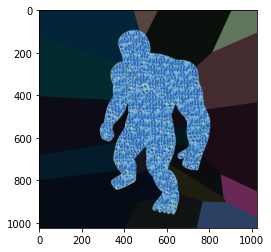

In [ ]:
print(g_c_use.shape)
plt.imshow(g_c_use)
plt.show()

0.0

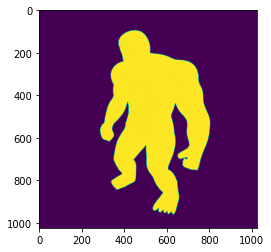

In [ ]:
a_z=img.imread("golem.001.png")[:,:,3]
plt.imshow(a_z)
a_z[200,200]

In [ ]:
# a_t=a_t/255.0

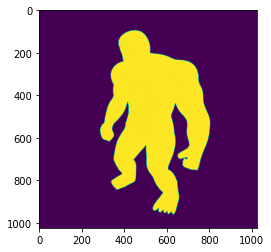

In [ ]:
plt.imshow(a_t)

In [ ]:
# p=np.dstack((a_t,a_t))
# pq=np.dstack((p,a_t))
# plt.imshow(pq)

(1024, 1024, 3)
(1024, 1024, 3)


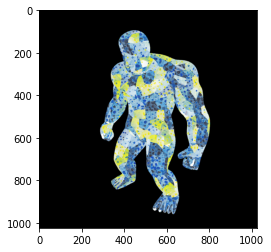

In [ ]:
import cv2

from google.colab.patches import cv2_imshow

p=np.dstack((a_t,a_t))
pq=np.dstack((p,a_t))

plt.imsave('pq.png', pq)
plt.imsave("G_C_RENDERED_TEXTURED_MODEL_BUNNY.png",g_c_use)
image1_render = cv2.imread('pq.png')
image2_render = cv2.imread('/content/G_C_RENDERED_TEXTURED_MODEL_BUNNY.png')
# cv2_imshow(image1_render)
# cv2_imshow(image2_render)
print(image1_render.shape)
print(image2_render.shape)
final_rendered_image=cv2.bitwise_and(image1_render,image2_render)
# cv2_imshow(final_rendered_image)
cv2.imwrite("finally_redndering_model_bunny.png", final_rendered_image)
finally_redndering_model=img.imread("finally_redndering_model_bunny.png")
plt.imshow(finally_redndering_model)

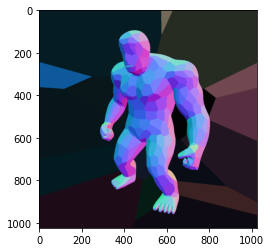

In [ ]:
plt.imshow(G_C_USE)

In [ ]:
plt.imsave('G_C_RENDERED_TEXTURED_MODEL.png', G_C_USE)

(1024, 1024, 4)


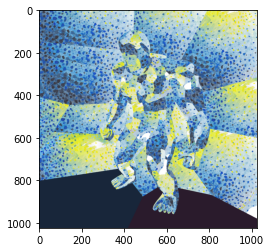

In [ ]:
rendered_model=img.imread("/content/G_C_RENDERED_TEXTURED_MODEL.png")
print(rendered_model.shape)
plt.imshow(rendered_model)

In [ ]:
from google.colab.patches import cv2_imshow

p=np.dstack((a_t,a_t))
pq=np.dstack((p,a_t))
# pqr=np.dstack((pq,a_t))
plt.imsave('pq.png', pq)

image1_render = cv2.imread('pq.png')
image2_render = cv2.imread('/content/G_C_RENDERED_TEXTURED_MODEL.png')
cv2_imshow(image1_render)
cv2_imshow(image2_render)
print(image1_render.shape)
print(image2_render.shape)
final_rendered_image=cv2.bitwise_and(image1_render,image2_render)
cv2_imshow(final_rendered_image)
cv2.write("final_rendered_image.png",final_rendered_image)
final_rendered_image=plt.imread("final_rendered_image.png")
plt.imshow(final_rendered_image)
plt.show()

In [ ]:
# # print(idx) #1024 x 1024 
# #c_s #486 x 486 x 3

# #correct
# def rendering(c_s,G_c,a_t):
#   G_C_USE=np.array(G_c)
#   dict1={} # {"int(group_no.)":[i-coordinate]}
#   dict2={} # {"int(group_no.)":[j-cordinate]}

#   for i in range(0,idx.shape[0]):
#     for j in range(0,idx.shape[1]):
#       if idx[i][j] not in dict1:
#         dict1[idx[i][j]]=[]
#         dict2[idx[i][j]]=[]
#       dict1[idx[i][j]].append(i)
#       dict2[idx[i][j]].append(j)

#   min_i=[]
#   min_j=[]
#   max_i=[]
#   max_j=[]
#   len_c_s=c_s.shape[0]
#   breadth_c_s=c_s.shape[1]

#   random_pt_i=[]
#   random_pt_j=[]

#   is_point_valid=[]

#   """
#   #for first cluster rendering
#   midddle_pixel_i=c_s.shape[0]//2
#   midddle_pixel_j=c_s.shape[1]//2
#   new_centroid_i,new_centroid_j,new_centroid_values=centroid_indexes(C_text,c_s)
#   nearest_Centroid_id=nearest_centroid_to_pixel(new_Centroid_values,c_s[middle_pixel_i,middle_pixel_j,:])


#   first_cluster_no_model=#write

#   min_i_first=min(dict1[first_cluster_no_model]))
#   min_j_first=min(dict2[first_cluster_no_model]))
#   max_i_first=max(dict1[first_cluster_no_model]))
#   max_j_first=max(dict2[first_cluster_no_model]))

#   u_len_i=max_i_first-min_i_first
#   u_len_j=max_j_first-min_j_first

#   random_point_i=new_centroid_i[nearest_centroid_id]
#   random_point_j=new_centroid_j[nearest_centroid_id]
#   random_point_pixel_value=new_centroid__values[nearest_centroid_id]


#   """

#   for u in range(0,200):
#     min_i.append(min(dict1[u]))
#     min_j.append(min(dict2[u]))
#     max_i.append(max(dict1[u]))
#     max_j.append(max(dict2[u]))
  

#     u_len_i=max_i[u]-min_i[u]
#     u_len_j=max_j[u]-min_j[u]

#     max_ref_i = max(len_c_s - u_len_i,0)
#     max_ref_j = max(breadth_c_s - u_len_j,0)
    
#     if max_ref_i==0 or max_ref_j==0:
#       is_point_valid.append(0)
#       max_ref_i+=1
#       max_ref_j+=1
#     else:
#       is_point_valid.append(1) 
    
#     ###  
    
    
#     random_point_i=np.random.randint(0,max_ref_i)
#     random_point_j=np.random.randint(0,max_ref_j)
#     random_pt_i.append(random_point_i)
#     random_pt_j.append(random_point_j)

#     ###
    
#   ctr=0
#   for i in range(0,idx.shape[0]):
#     for j in range(0,idx.shape[1]):
#       grp=idx[i][j]
#       if a_t[i][j]==0 or is_point_valid[grp]==0:
#         # print(i,j)
#         continue

#       ctr+=1
      
#       a=random_pt_i[grp] + (i-min_i[grp])
#       b=random_pt_j[grp] + (j-min_j[grp])

      
      
#       G_C_USE[i][j][0]=c_s[a][b][0] #cv2.bitwise_and(np.asarray([255.0]),np.asarray(c_s[a][b][0]))[0][0]
#       G_C_USE[i][j][1]=c_s[a][b][1] #cv2.bitwise_and(np.asarray([255.0]),np.asarray(c_s[a][b][1]))[0][0]
#       G_C_USE[i][j][2]=c_s[a][b][2] #cv2.bitwise_and(np.asarray([255.0]),np.asarray(c_s[a][b][2]))[0][0]

      
#       # G_C_USE[i][j][1]=G_C_USE[i][j][0] & c_s[a][b][0]
#       # G_C_USE[i][j][1]=G_C_USE[i][j][1] & c_s[a][b][1]
#       # G_C_USE[i][j][2]=G_C_USE[i][j][2] & c_s[a][b][2]

  
#   print(ctr)
#   return G_C_USE


















In [ ]:
# def clustering_of_texture(c_s,k):
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(c_s)
#     C_texture=kmeans.cluster_centers_

#     return C_texture


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
dic[180] #70359 pixels



[array([0.        , 0.        , 0.        , 0.00390625, 0.00390625]),
 array([0.00980392, 0.06666667, 0.05816994, 0.47721354, 1.52864583]),
 array([0.        , 0.        , 0.        , 0.00390625, 0.0078125 ]),
 array([0.        , 0.        , 0.        , 0.00390625, 0.01171875]),
 array([0.        , 0.        , 0.        , 0.00390625, 0.015625  ]),
 array([0.        , 0.        , 0.        , 0.00390625, 0.01953125]),
 array([0.        , 0.        , 0.        , 0.00390625, 0.0234375 ]),
 array([0.        , 0.        , 0.        , 0.00390625, 0.02734375]),
 array([0.        , 0.        , 0.        , 0.00390625, 0.03125   ]),
 array([0.        , 0.        , 0.        , 0.00390625, 0.03515625]),
 array([0.        , 0.        , 0.        , 0.00390625, 0.0390625 ]),
 array([0.        , 0.        , 0.        , 0.00390625, 0.04296875]),
 array([0.        , 0.        , 0.        , 0.00390625, 0.046875  ]),
 array([0.        , 0.        , 0.        , 0.00390625, 0.05078125]),
 array([0.        , 

In [ ]:
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

L_c=label2rgb(idx)

p=np.dstack((a_t,a_t))
pq=np.dstack((p,a_t))
plt.imsave('pq.png', pq)
plt.imsave('L_c.png',L_c)

image1 = cv2.imread('pq.png')
image2 = cv2.imread('L_c.png')
# cv2_imshow(image1)
# cv2_imshow(image2)
# print(image1.shape)
# print(image2.shape)
clustered_image=cv2.bitwise_and(image1,image2)
# cv2_imshow(clustered_image)
plt.imsave("clustered_image.png",clustered_image)
final_cluster=plt.imread("clustered_image.png")
plt.imshow(final_cluster)
plt.show()

NameError: ignored

(5,)


(486, 486, 4)

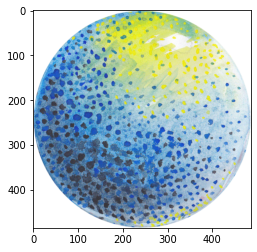

In [ ]:
print(C[50].shape)
vl = img.imread("01.png")
plt.imshow(vl)
vl.shape

In [ ]:
def feature_selection_dbscan(g_t, a_t, k):
  sample_per_cluster = 32
  h,w = g_t.shape[:2]
  P, scalar = position_features(h,w)

  w_p = 4.0
  print("hello")
  X=np.dstack((g_t, w_p*P))
  # X=np.concatenate((g_t, w_p*P), axis = 2)
  # print("X: ",X)
  # print(X[0:10,0:10,0])
  X = np.reshape(X, (h*w,-1))
  print("X:",X.shape)
  # print(X[0:10,:])
  A_X = np.reshape(a_t, (h*w,-1))
  print("A_X:",A_X.shape)
  # print(A_X[0:10,:])
  x_roi,index = region_of_interest(A_X,X)
  # print(x_roi[0:10,:])
  # print(index[0:10])
 

  print("x_roi:",x_roi.shape)
  num_roi = len(x_roi)
  num_samples = sample_per_cluster * k
  num_samples = min(num_samples, num_roi)

  sample_ids = randint(num_roi, num_samples)
  x_samples = x_region_of_interest(x_roi,sample_ids)

  """
  kmeans = KMeans(n_clusters=k, random_state=0).fit(x_samples)
  C=kmeans.cluster_centers_
  """
  ##dbscan
  # x_samples=x_roi
  clustering = DBSCAN(eps=0.2, min_samples=32, metric = 'euclidean',algorithm ='auto').fit(x_samples)
  # clustering = DBSCAN(eps=0.2, min_samples=sample_per_cluster).fit(x_samples)
  C=clustering.components_
  labels=clustering.labels_
  print("labels:",np.asarray(labels))
  print("C:",C.shape)

  idx = knnsearch(C, X);

  idx=np.asarray(idx)
  print("idx:",idx.shape)

  rendering_index=idx #for rendering function
 
  G_c = []
  for i in idx:
    G_c.append(C[i,0:3])
  G_c = np.asarray(G_c)
  print(G_c.shape)

  G_c = np.reshape(G_c, (h,w,-1))
  print(G_c.shape)

  P_c = []
  for i in idx:
    P_c.append(C[i,3:5])
  
  P_c = np.asarray(P_c)

  P_c = scaler * P_c / w_p

  P_c = np.reshape(P_c, (h,w,-1))
  print("P_c shape:" , P_c.shape)

  idx = np.reshape(idx,(h,w))

  return idx,G_c, P_c,C,A_X,x_roi,rendering_index

In [ ]:

# idx_db, G_c_db, P_c_db,C_db,A_X_db,x_roi_db = feature_selection_dbscan(g_t,a_t,200)

h: 1024
w: 1024
x:  [   1    2    3 ... 1022 1023 1024]
y:  [   1    2    3 ... 1022 1023 1024]
X:  [[   1    2    3 ... 1022 1023 1024]
 [   1    2    3 ... 1022 1023 1024]
 [   1    2    3 ... 1022 1023 1024]
 ...
 [   1    2    3 ... 1022 1023 1024]
 [   1    2    3 ... 1022 1023 1024]
 [   1    2    3 ... 1022 1023 1024]]
Y:  [[   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 [   3    3    3 ...    3    3    3]
 ...
 [1022 1022 1022 ... 1022 1022 1022]
 [1023 1023 1023 ... 1023 1023 1023]
 [1024 1024 1024 ... 1024 1024 1024]]
P:  [[[   1    1]
  [   1    2]
  [   1    3]
  ...
  [   1 1022]
  [   1 1023]
  [   1 1024]]

 [[   2    1]
  [   2    2]
  [   2    3]
  ...
  [   2 1022]
  [   2 1023]
  [   2 1024]]

 [[   3    1]
  [   3    2]
  [   3    3]
  ...
  [   3 1022]
  [   3 1023]
  [   3 1024]]

 ...

 [[1022    1]
  [1022    2]
  [1022    3]
  ...
  [1022 1022]
  [1022 1023]
  [1022 1024]]

 [[1023    1]
  [1023    2]
  [1023    3]
  ...
  [1023 1022]


KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  


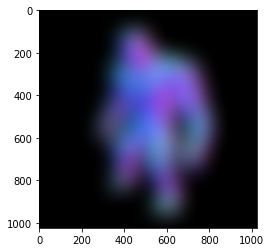

In [ ]:
from skimage.filters import gaussian
B=gaussian(g_t, sigma=50,mode = 'nearest',truncate=2.0)
plt.imshow(B)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


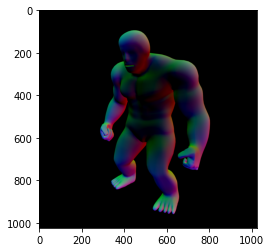

In [ ]:
D=g_t-B
plt.imshow(D)

g_s: (512, 512, 3)


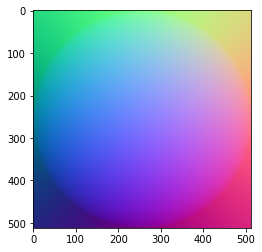

In [ ]:
g_s=img.imread("normal.png")
print("g_s:",g_s.shape)
plt.imshow(g_s)
h_s,w_s=g_s.shape[0],g_s.shape[1]

In [ ]:
Qy=np.floor(h_s*(1.0-g_t[:,:,1]))
print(Qy.shape)

(1024, 1024)


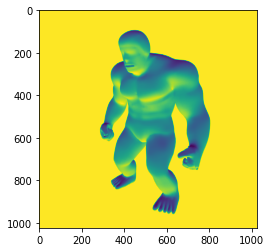

In [ ]:
plt.imshow(Qy)

In [ ]:
Qx=np.floor(w_s*(1.0-g_t[:,:,0]))
print(Qx.shape)

(1024, 1024)


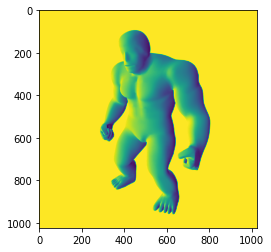

In [ ]:
plt.imshow(Qx)

In [ ]:
di={}
for i in range(Qy.shape[0]):
  for j in range(Qy.shape[1]):
    if Qy[i][j] not in di:
      di[Qy[i][j]]=1
    elif Qy[i][j] in di:
      di[Qy[i][j]]+=1

In [ ]:
di

{0.0: 1,
 2.0: 6,
 4.0: 13,
 6.0: 16,
 8.0: 22,
 10.0: 22,
 12.0: 17,
 14.0: 22,
 16.0: 19,
 18.0: 22,
 20.0: 21,
 22.0: 23,
 24.0: 24,
 26.0: 51,
 28.0: 87,
 30.0: 113,
 32.0: 116,
 34.0: 131,
 36.0: 160,
 38.0: 189,
 40.0: 224,
 42.0: 244,
 44.0: 264,
 46.0: 268,
 48.0: 304,
 50.0: 324,
 52.0: 316,
 54.0: 310,
 56.0: 355,
 58.0: 372,
 60.0: 387,
 62.0: 387,
 64.0: 374,
 66.0: 388,
 68.0: 402,
 70.0: 384,
 72.0: 412,
 74.0: 435,
 76.0: 389,
 78.0: 427,
 80.0: 475,
 82.0: 486,
 84.0: 508,
 86.0: 514,
 88.0: 465,
 90.0: 474,
 92.0: 458,
 94.0: 441,
 96.0: 525,
 98.0: 540,
 100.0: 527,
 102.0: 485,
 104.0: 449,
 106.0: 471,
 108.0: 484,
 110.0: 438,
 112.0: 427,
 114.0: 433,
 116.0: 445,
 118.0: 435,
 120.0: 430,
 122.0: 443,
 124.0: 529,
 126.0: 614,
 128.0: 601,
 130.0: 659,
 132.0: 675,
 134.0: 659,
 136.0: 642,
 138.0: 660,
 140.0: 675,
 142.0: 766,
 144.0: 806,
 146.0: 839,
 148.0: 945,
 150.0: 987,
 152.0: 1134,
 154.0: 1336,
 156.0: 1376,
 158.0: 1288,
 160.0: 1222,
 162.0: 1281,


In [ ]:
dic={}
for i in range(Qx.shape[0]):
  for j in range(Qx.shape[1]):
    if Qx[i][j] not in dic:
      dic[Qx[i][j]]=1
    elif Qx[i][j] in dic:
      dic[Qx[i][j]]+=1

In [ ]:
dic

{0.0: 1,
 2.0: 16,
 4.0: 17,
 6.0: 34,
 8.0: 48,
 10.0: 78,
 12.0: 102,
 14.0: 134,
 16.0: 188,
 18.0: 220,
 20.0: 271,
 22.0: 280,
 24.0: 318,
 26.0: 338,
 28.0: 363,
 30.0: 452,
 32.0: 488,
 34.0: 592,
 36.0: 611,
 38.0: 627,
 40.0: 588,
 42.0: 643,
 44.0: 720,
 46.0: 746,
 48.0: 707,
 50.0: 729,
 52.0: 757,
 54.0: 762,
 56.0: 768,
 58.0: 770,
 60.0: 685,
 62.0: 774,
 64.0: 819,
 66.0: 722,
 68.0: 768,
 70.0: 795,
 72.0: 815,
 74.0: 809,
 76.0: 869,
 78.0: 812,
 80.0: 821,
 82.0: 878,
 84.0: 910,
 86.0: 899,
 88.0: 882,
 90.0: 888,
 92.0: 886,
 94.0: 919,
 96.0: 901,
 98.0: 963,
 100.0: 945,
 102.0: 923,
 104.0: 932,
 106.0: 947,
 108.0: 930,
 110.0: 935,
 112.0: 908,
 114.0: 930,
 116.0: 893,
 118.0: 853,
 120.0: 911,
 122.0: 877,
 124.0: 868,
 126.0: 897,
 128.0: 851,
 130.0: 891,
 132.0: 881,
 134.0: 815,
 136.0: 834,
 138.0: 873,
 140.0: 793,
 142.0: 824,
 144.0: 837,
 146.0: 850,
 148.0: 848,
 150.0: 864,
 152.0: 841,
 154.0: 831,
 156.0: 843,
 158.0: 882,
 160.0: 876,
 162.0: 8

In [ ]:
cn=0
for k in di.keys():
  if k in dic.keys():
    cn+=1

In [ ]:
di.keys()==dic.keys()

True

In [ ]:
Qy

array([[512., 512., 512., ..., 512., 512., 512.],
       [512., 512., 512., ..., 512., 512., 512.],
       [512., 512., 512., ..., 512., 512., 512.],
       ...,
       [512., 512., 512., ..., 512., 512., 512.],
       [512., 512., 512., ..., 512., 512., 512.],
       [512., 512., 512., ..., 512., 512., 512.]], dtype=float32)

In [ ]:
Qx

array([[512., 512., 512., ..., 512., 512., 512.],
       [512., 512., 512., ..., 512., 512., 512.],
       [512., 512., 512., ..., 512., 512., 512.],
       ...,
       [512., 512., 512., ..., 512., 512., 512.],
       [512., 512., 512., ..., 512., 512., 512.],
       [512., 512., 512., ..., 512., 512., 512.]], dtype=float32)

In [ ]:
Qy[1022,1022]

512.0

In [ ]:
c_s = img.imread("01.png")[:,:,:3]
a_s = img.imread("01.png")[:,:,3]

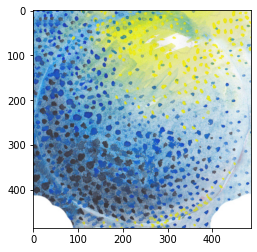

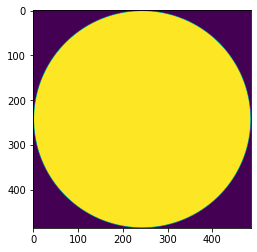

(486, 486, 3)

In [ ]:
plt.imshow(c_s)
plt.show()
plt.imshow(a_s);
plt.show()
c_s.shape

In [ ]:
from skimage.transform import resize
g_s=resize(g_s,(486,486))

(486, 486, 3)


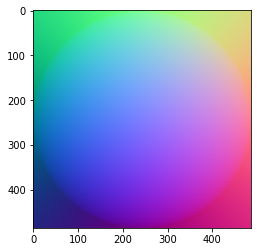

In [ ]:
print(g_s.shape)
plt.imshow(g_s)
plt.show()

In [ ]:
C

array([[7.74938739e-01, 2.67524519e-01, 8.35049029e-01, 1.00335693e+00,
        1.90374756e+00],
       [3.30980406e-02, 5.89333355e-01, 6.32156881e-01, 2.13562500e+00,
        2.75953125e+00],
       [2.69131662e-01, 4.79775923e-01, 9.34565830e-01, 2.89810268e+00,
        2.11395089e+00],
       [1.56156867e-01, 5.41098063e-01, 8.49725499e-01, 1.33046875e+00,
        1.84593750e+00],
       [5.87522306e-01, 3.26773629e-01, 9.54652409e-01, 1.31661932e+00,
        2.73757102e+00],
       [6.93435653e-01, 5.12361486e-01, 9.46803072e-01, 2.92204484e+00,
        2.33084239e+00],
       [5.01815557e-01, 7.75018169e-01, 8.91503274e-01, 2.18938079e+00,
        1.22207755e+00],
       [4.49838680e-01, 4.84388199e-01, 9.90369819e-01, 2.16999604e+00,
        2.19457081e+00],
       [3.43529419e-01, 6.55014026e-01, 9.36470592e-01, 2.31785714e+00,
        2.85892857e+00],
       [5.98431395e-01, 4.09098047e-01, 9.71294119e-01, 9.73750000e-01,
        2.03406250e+00],
       [5.50065379e-01, 7.9416

In [ ]:
import numpy as np
def clamp(x,a,b):
   y=np.maximum(np.minimum(x,[b]),[a])
   return y

x=[[1,2,4],[5,6,7]]
a=1
b=5

print(clamp(x,a,b))

[[1 2 4]
 [5 5 5]]


In [ ]:
# # X=[[1,2,3,4,5],[6,7,8,9,0]]
# def rendering_collection_dictionary(C,X,id):
#     dictionary={}
   
#     for i in range(len(id)): #cluster index / centroid index 
#       if id[i] not in dictionary: #idx[i] is cluster number/cluster index
#         dictionary[id[i]]=[X[i]]
#         dictionary[id[i]].append(C[id[i]])
#       elif i in dictionary:
#         dictionary[id[i]].append(X[i])
    
#      return dictionary

#     #dictionary ={"cluter number: [[1,2,3,4,5],[6,7,8,9,0],[11,12,13,14,15]]"}


# dic=rendering_collection_dictionary(C,X,rendering_idx)   


TypeError: ignored

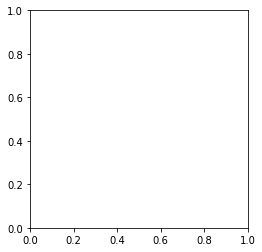

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.asarray([7.74938739e-01, 2.67524519e-01, 8.35049029e-01, 1.00335693e+00,1.90374756e+00]))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

z=np.asarray([[7.74938739e-01, 2.67524519e-01, 8.35049029e-01, 1.00335693e+00,
        1.90374756e+00],
       [3.30980406e-02, 5.89333355e-01, 6.32156881e-01, 2.13562500e+00,
        2.75953125e+00],
       [2.69131662e-01, 4.79775923e-01, 9.34565830e-01, 2.89810268e+00,
        2.11395089e+00],
       [1.56156867e-01, 5.41098063e-01, 8.49725499e-01, 1.33046875e+00,
        1.84593750e+00],
       [5.87522306e-01, 3.26773629e-01, 9.54652409e-01, 1.31661932e+00,
        2.73757102e+00],
       [6.93435653e-01, 5.12361486e-01, 9.46803072e-01, 2.92204484e+00,
        2.33084239e+00],
       [5.01815557e-01, 7.75018169e-01, 8.91503274e-01, 2.18938079e+00,
        1.22207755e+00],
       [4.49838680e-01, 4.84388199e-01, 9.90369819e-01, 2.16999604e+00,
        2.19457081e+00],
       [3.43529419e-01, 6.55014026e-01, 9.36470592e-01, 2.31785714e+00,
        2.85892857e+00],
       [5.98431395e-01, 4.09098047e-01, 9.71294119e-01, 9.73750000e-01,
        2.03406250e+00],
       [5.50065379e-01, 7.94161232e-01, 8.80435737e-01, 3.56449653e+00,
        2.37196181e+00],
       [7.24760618e-01, 1.78568176e-01, 7.95348849e-01, 2.93977108e+00,
        1.64998183e+00],
       [1.82488171e-01, 3.84854638e-01, 8.65246796e-01, 1.93406519e+00,
        1.82549838e+00],
       [3.96424460e-01, 3.79354100e-01, 9.62053059e-01, 2.71266085e+00,
        1.55422794e+00],
       [8.36456074e-01, 3.63398701e-01, 8.32970235e-01, 1.60098380e+00,
        2.41825810e+00],
       [4.19381607e-01, 1.91628963e-01, 8.77073914e-01, 7.33698918e-01,
        1.66947115e+00],
       [7.13289777e-01, 6.11873661e-01, 9.26470593e-01, 2.11176215e+00,
        3.07356771e+00],
       [9.01960818e-02, 4.98599455e-02, 5.32212905e-02, 2.95145089e+00,
        2.44196429e+00],
       [4.99673218e-01, 4.93545766e-01, 9.89379086e-01, 1.80891927e+00,
        1.38118490e+00],
       [4.27621495e-01, 6.84398994e-01, 8.90878097e-01, 3.17306386e+00,
        1.40641984e+00],
       [6.50678754e-01, 7.88386136e-01, 8.57918561e-01, 1.00570913e+00,
        2.73542668e+00],
       [2.03473394e-01, 6.25154084e-01, 8.74789923e-01, 1.20976563e+00,
        1.62695313e+00],
       [1.53226386e-01, 2.69875230e-01, 7.49019623e-01, 1.56235795e+00,
        1.44169034e+00],
       [6.19958006e-01, 5.00700298e-01, 9.77240898e-01, 1.51771763e+00,
        2.80419922e+00],
       [5.75470995e-01, 4.45597852e-01, 9.84083046e-01, 2.50459559e+00,
        1.71920956e+00],
       [8.00000012e-01, 4.35457526e-01, 8.85620922e-01, 6.38671875e-01,
        1.89453125e+00],
       [4.12903232e-01, 2.90196087e-01, 9.38519928e-01, 1.80569556e+00,
        2.71723790e+00],
       [5.91487350e-01, 1.31516025e-01, 8.06599725e-01, 1.60880335e+00,
        2.13224085e+00],
       [9.00576707e-01, 5.70357573e-01, 7.68627465e-01, 2.61891085e+00,
        2.91934743e+00],
       [8.49836610e-01, 2.35784320e-01, 7.12581716e-01, 1.93603516e+00,
        1.48372396e+00],
       [4.06498605e-01, 2.59271714e-01, 9.20224094e-01, 3.11428571e+00,
        2.22332589e+00],
       [3.79166674e-01, 6.17769631e-01, 9.67095590e-01, 1.16436768e+00,
        2.17248535e+00],
       [3.29411775e-01, 6.52451001e-01, 9.39411768e-01, 2.62490234e+00,
        2.16728516e+00],
       [8.98671733e-01, 5.38519943e-01, 7.51549667e-01, 3.41784274e+00,
        2.53452621e+00],
       [2.83065963e-01, 6.19340485e-01, 9.25668454e-01, 2.31010298e+00,
        1.61665483e+00],
       [9.76470612e-02, 7.33333343e-02, 1.68235298e-01, 3.08945312e+00,
        1.49023438e+00],
       [4.14260258e-01, 1.60071305e-01, 8.22578739e-01, 2.36375473e+00,
        1.92282197e+00],
       [9.36274544e-02, 2.77614387e-01, 6.63562110e-01, 7.20214844e-01,
        1.51660156e+00],
       [3.61764714e-01, 1.66013077e-01, 8.36819182e-01, 1.34657118e+00,
        2.47482639e+00],
       [2.92078440e-01, 1.70352946e-01, 8.02196090e-01, 3.29203125e+00,
        2.25921875e+00],
       [1.30650158e-01, 1.89680089e-01, 5.97110444e-01, 1.86348684e+00,
        2.60793586e+00],
       [5.07450996e-01, 1.59411769e-01, 8.37254912e-01, 2.81562500e+00,
        2.76914063e+00],
       [8.51336907e-01, 5.95365442e-01, 8.19845525e-01, 2.30160985e+00,
        2.43359375e+00],
       [2.03921576e-02, 3.45882359e-01, 4.58039230e-01, 1.69687500e+00,
        1.58125000e+00],
       [5.25180619e-01, 7.11558325e-01, 9.43859652e-01, 9.63507401e-01,
        2.32339638e+00],
       [4.39215703e-02, 4.86274525e-02, 3.92156882e-02, 8.64062500e-01,
        2.47187500e+00],
       [5.90905323e-01, 4.30037556e-01, 9.80559033e-01, 1.76338098e+00,
        2.85081449e+00],
       [2.17086840e-01, 5.40616261e-01, 8.58263314e-01, 3.67410714e+00,
        2.18331473e+00],
       [9.47712446e-02, 9.24836629e-02, 1.69934645e-01, 3.67936198e+00,
        2.31347656e+00],
       [1.36246502e-01, 5.32997219e-01, 8.23417377e-01, 2.56160714e+00,
        1.44252232e+00],
       [5.03619926e-01, 4.48717961e-01, 9.82654601e-01, 5.65655048e-01,
        1.68674880e+00],
       [5.59150347e-01, 2.08605671e-01, 8.89978220e-01, 1.07736545e+00,
        1.79893663e+00],
       [1.15376681e-01, 6.27244604e-01, 7.68833863e-01, 1.95086349e+00,
        1.23601974e+00],
       [3.21568636e-01, 8.16153139e-01, 8.16433250e-01, 2.59077381e+00,
        2.70293899e+00],
       [7.13122189e-01, 5.81598818e-01, 9.36249375e-01, 2.69391026e+00,
        2.33573718e+00],
       [7.80882366e-01, 3.03308832e-01, 8.40931382e-01, 2.49475098e+00,
        1.87561035e+00],
       [3.19680474e-01, 7.30864214e-01, 8.85257814e-01, 4.75260417e-01,
        1.60633681e+00],
       [5.17464675e-01, 3.72913824e-01, 9.76926586e-01, 1.92269259e+00,
        2.21021076e+00],
       [3.19990446e-01, 4.64084185e-01, 9.57627932e-01, 2.13424162e+00,
        2.01009909e+00],
       [7.80693829e-01, 3.97184521e-01, 8.90497744e-01, 1.85897436e+00,
        2.35196314e+00],
       [9.26901965e-01, 3.92000010e-01, 6.76078451e-01, 2.14593750e+00,
        1.31328125e+00],
       [2.11479506e-01, 3.00534770e-01, 8.51622112e-01, 1.78245739e+00,
        1.84865057e+00],
       [8.91967116e-01, 7.21062635e-01, 6.55534492e-01, 3.03893649e+00,
        2.44178427e+00],
       [7.46542843e-01, 6.08049559e-01, 9.06914350e-01, 3.10896382e+00,
        1.66714638e+00],
       [2.56162473e-01, 4.21428576e-01, 9.08823535e-01, 1.51883371e+00,
        2.55650112e+00],
       [7.45098063e-02, 2.96918780e-02, 5.26610659e-02, 2.65290179e+00,
        3.00558036e+00],
       [3.57885770e-01, 5.09121925e-01, 9.64705884e-01, 1.93240489e+00,
        2.85427989e+00],
       [7.75163412e-01, 3.98692816e-01, 8.96494361e-01, 1.33913352e+00,
        2.85452178e+00],
       [5.01960801e-01, 1.51215690e-01, 8.34352951e-01, 1.62875000e+00,
        1.50343750e+00],
       [4.31372570e-03, 7.09803937e-02, 6.78431391e-02, 1.85664063e+00,
        1.24062500e+00],
       [1.67571648e-01, 4.16591264e-01, 8.07390660e-01, 2.80558894e+00,
        2.69966947e+00],
       [1.66199817e-01, 8.14192355e-01, 5.37254920e-01, 3.50632440e+00,
        2.21540179e+00],
       [6.42796266e-02, 6.24040943e-01, 6.95311186e-01, 2.51953125e+00,
        2.00424592e+00],
       [2.07086346e-01, 4.77949788e-01, 9.01823191e-01, 2.11218476e+00,
        1.84039200e+00],
       [8.19271719e-01, 6.46610665e-01, 8.32829142e-01, 1.84129464e+00,
        3.04531250e+00],
       [3.30392167e-01, 4.06209163e-01, 9.49455341e-01, 1.19042969e+00,
        2.41210938e+00],
       [3.12771606e-01, 8.39215696e-01, 7.75092753e-01, 1.00971284e+00,
        1.51256334e+00],
       [6.52748963e-01, 2.66666676e-01, 9.07497122e-01, 7.39659926e-01,
        1.81479779e+00],
       [6.90505694e-01, 5.46749248e-01, 9.51702789e-01, 2.39216694e+00,
        2.99814967e+00],
       [2.95372558e-01, 1.61725495e-01, 7.92156875e-01, 2.91937500e+00,
        1.50312500e+00],
       [8.11764717e-01, 3.88129314e-01, 8.46528891e-01, 3.19784628e+00,
        2.47540118e+00],
       [9.46907997e-01, 5.74660650e-01, 6.76018119e-01, 2.82602163e+00,
        1.74519231e+00],
       [2.52218790e-01, 4.52425194e-01, 9.16511873e-01, 1.21402138e+00,
        1.45137747e+00],
       [1.16202274e-01, 3.98245620e-01, 7.96594439e-01, 2.18050987e+00,
        1.71093750e+00],
       [5.22549037e-01, 8.17647070e-01, 6.08823545e-01, 8.14453125e-01,
        2.19335938e+00],
       [7.32549036e-01, 6.06050440e-01, 9.15182078e-01, 1.12633929e+00,
        2.80412946e+00],
       [1.75490201e-01, 6.51540637e-01, 8.36414576e-01, 1.76325335e+00,
        1.31040737e+00],
       [4.92997215e-02, 3.47338947e-02, 5.54621865e-02, 2.57979911e+00,
        1.90457589e+00],
       [2.92614389e-01, 6.43464074e-01, 9.24379089e-01, 1.22819010e+00,
        1.97623698e+00],
       [8.19172124e-01, 2.35584609e-01, 7.66303572e-01, 2.69126157e+00,
        1.74985532e+00],
       [6.38159901e-01, 3.85972857e-01, 9.58748117e-01, 1.42187500e+00,
        2.24834736e+00],
       [4.02317298e-01, 7.17557949e-01, 9.32174692e-01, 2.43723366e+00,
        2.21297940e+00],
       [4.21568637e-01, 3.48366017e-01, 2.97385628e-01, 5.98307292e-01,
        2.02799479e+00],
       [4.66584978e-01, 3.29248376e-01, 9.60620917e-01, 9.12841797e-01,
        1.70475260e+00],
       [9.11880051e-01, 4.49826998e-01, 7.55132656e-01, 7.02435662e-01,
        1.99437040e+00],
       [3.22240906e-01, 4.27563033e-01, 9.52100843e-01, 1.43811384e+00,
        1.70033482e+00],
       [6.56862764e-02, 4.60784320e-02, 4.60784321e-02, 1.73632812e+00,
        3.05566406e+00],
       [5.92647076e-01, 4.30147067e-01, 9.62745100e-01, 2.76171875e+00,
        2.81372070e+00],
       [8.92572793e-01, 5.55674416e-01, 7.62329187e-01, 2.06877367e+00,
        2.41714015e+00],
       [7.67665571e-01, 2.12356646e-01, 7.97040338e-01, 1.49653597e+00,
        2.34168632e+00],
       [5.89035638e-01, 6.75390175e-01, 9.49099643e-01, 1.95336416e+00,
        3.00175383e+00],
       [3.12309375e-01, 8.80827894e-01, 7.31808295e-01, 3.11935764e+00,
        1.46809896e+00],
       [1.63983492e-01, 6.61713126e-01, 8.21981435e-01, 2.11708470e+00,
        2.82236842e+00],
       [5.51083612e-01, 1.31888549e-01, 8.23942219e-01, 2.92423931e+00,
        1.57123766e+00],
       [4.90196107e-03, 3.92156874e-02, 2.74509811e-02, 2.49511719e+00,
        2.68652344e+00],
       [4.41404476e-01, 4.96124044e-01, 9.89876882e-01, 2.91233648e+00,
        2.23037791e+00],
       [8.35854352e-01, 4.96171819e-01, 8.19234371e-01, 3.67261905e+00,
        2.32533482e+00],
       [6.40486075e-01, 3.01132295e-01, 9.29853636e-01, 1.70048415e+00,
        2.25517165e+00],
       [1.42156867e-02, 1.49019612e-01, 2.00000007e-01, 7.04101562e-01,
        1.49902344e+00],
       [6.70794652e-02, 4.03715179e-01, 6.30340575e-01, 9.67310855e-01,
        1.54605263e+00],
       [2.60620924e-01, 1.38235297e-01, 7.22875834e-01, 1.35205078e+00,
        1.44417318e+00],
       [8.27276699e-01, 6.07145993e-01, 8.48714606e-01, 2.52100694e+00,
        2.41814236e+00],
       [2.30892365e-01, 3.00920377e-01, 8.54181681e-01, 2.31114477e+00,
        1.88113839e+00],
       [5.38639002e-01, 8.46597472e-01, 7.90080751e-01, 4.04871324e-01,
        1.76447610e+00],
       [2.33660138e-01, 3.00980398e-01, 8.56862754e-01, 6.64062500e-01,
        1.56087240e+00],
       [7.83160336e-01, 7.36793557e-01, 8.16839688e-01, 3.57594210e+00,
        2.45967371e+00],
       [4.41596646e-01, 3.51260513e-01, 9.65546221e-01, 1.42675781e+00,
        2.64592634e+00],
       [9.01960817e-02, 4.79058841e-01, 7.63764720e-01, 2.83218750e+00,
        2.00953125e+00],
       [4.71616853e-01, 8.28608175e-01, 8.58373522e-01, 9.92507684e-01,
        2.54194416e+00],
       [1.72549025e-01, 3.98431380e-01, 8.32941186e-01, 2.25507812e+00,
        1.16210938e+00],
       [5.44680870e-01, 2.91197339e-01, 9.45098042e-01, 3.11311503e+00,
        2.34350066e+00],
       [8.40336162e-02, 4.08963593e-02, 6.66666685e-02, 1.88392857e+00,
        2.50055804e+00],
       [7.08641993e-01, 3.84458976e-01, 9.29048661e-01, 1.90726273e+00,
        1.43337674e+00],
       [6.64404241e-01, 8.50527912e-01, 7.70286590e-01, 2.52884615e+00,
        2.85967548e+00],
       [1.43529416e-01, 5.31316545e-01, 8.31708694e-01, 1.40345982e+00,
        1.54676339e+00],
       [4.16520659e-01, 4.31289115e-01, 9.82311223e-01, 1.60056516e+00,
        2.66015625e+00],
       [5.52451004e-01, 6.01470612e-01, 9.81372550e-01, 2.31217448e+00,
        2.95410156e+00],
       [3.79411772e-01, 5.14052302e-01, 9.65032682e-01, 2.25976562e+00,
        1.18033854e+00],
       [3.49976096e-01, 8.76614068e-01, 7.70731721e-01, 3.53458460e+00,
        2.25552591e+00],
       [8.39450990e-01, 2.88784324e-01, 7.85960797e-01, 8.44375000e-01,
        1.93992188e+00],
       [6.73553343e-01, 5.26924939e-01, 9.60879964e-01, 2.14100610e+00,
        2.32498095e+00],
       [1.03267977e-01, 5.01307204e-01, 3.76470596e-01, 2.63802083e+00,
        2.61263021e+00],
       [6.79034705e-01, 2.12066369e-01, 7.66817508e-01, 2.36568510e+00,
        1.27343750e+00],
       [1.30718962e-03, 1.30718959e-02, 1.83006545e-02, 1.41145833e+00,
        1.34375000e+00],
       [1.32428359e-01, 2.66163911e-01, 7.30316758e-01, 1.67147436e+00,
        1.75951522e+00],
       [1.92745104e-01, 3.33529422e-01, 8.43333343e-01, 1.69570312e+00,
        2.56250000e+00],
       [6.56149749e-01, 6.75579344e-02, 6.47058843e-01, 1.13281250e+00,
        1.81800426e+00],
       [3.67468814e-01, 2.00000005e-01, 8.59536550e-01, 1.62730824e+00,
        1.98508523e+00],
       [7.13992887e-01, 4.83244217e-01, 9.45365422e-01, 1.68448153e+00,
        2.91779119e+00],
       [2.19607849e-01, 6.09269185e-01, 8.90730844e-01, 2.71386719e+00,
        2.07173295e+00],
       [2.20439698e-01, 6.82590631e-01, 8.51812249e-01, 1.12156723e+00,
        1.42365057e+00],
       [8.70588243e-01, 5.07843157e-01, 8.18137266e-01, 2.21118164e+00,
        3.11279297e+00],
       [4.49197871e-01, 2.31075464e-01, 9.13250154e-01, 1.78160511e+00,
        2.06794508e+00],
       [1.30490199e-01, 4.26470593e-01, 8.19019619e-01, 1.50117187e+00,
        1.83974609e+00],
       [8.45353803e-01, 5.65984679e-01, 8.28729763e-01, 1.50594429e+00,
        2.96127717e+00],
       [4.14865487e-01, 5.77747402e-01, 9.81304151e-01, 1.00817587e+00,
        2.15997456e+00],
       [4.48366031e-01, 2.54248373e-01, 3.38562101e-01, 2.12890625e+00,
        3.09765625e+00],
       [8.86764713e-01, 4.83006551e-01, 7.90359490e-01, 2.72363281e+00,
        2.40462240e+00],
       [6.67413648e-01, 6.83473409e-02, 6.32679760e-01, 1.70554315e+00,
        1.56305804e+00],
       [6.32644431e-01, 7.08850044e-01, 9.23582410e-01, 2.41765203e+00,
        2.33013091e+00],
       [3.05156146e-01, 4.97966610e-01, 9.54030504e-01, 1.43178530e+00,
        1.99052373e+00],
       [5.91372573e-01, 3.64705890e-01, 4.39215690e-01, 1.25703125e+00,
        2.93281250e+00],
       [4.27023180e-01, 6.76149752e-01, 9.54509807e-01, 2.10177557e+00,
        2.92521307e+00],
       [3.38258103e-01, 5.49110830e-01, 9.63064298e-01, 2.49800145e+00,
        1.55950218e+00],
       [2.50420175e-01, 5.60224112e-01, 9.19701219e-01, 2.31956845e+00,
        2.09840030e+00],
       [3.55234933e-01, 3.53977071e-01, 9.49463562e-01, 1.95430425e+00,
        2.01179245e+00],
       [1.69063184e-01, 2.50544668e-01, 7.59695002e-01, 3.09592014e+00,
        2.12348090e+00],
       [9.15931378e-01, 3.58455891e-01, 7.15931389e-01, 1.79113770e+00,
        2.44445801e+00],
       [5.86554642e-01, 8.31792727e-01, 8.47619057e-01, 3.15011161e+00,
        1.55594308e+00],
       [6.18591163e-01, 8.64923755e-01, 8.08133635e-01, 8.80931713e-01,
        2.36993634e+00],
       [1.05555559e-01, 6.24836624e-01, 7.59313740e-01, 2.36751302e+00,
        2.79264323e+00],
       [7.29411787e-02, 5.33333353e-01, 7.45882368e-01, 2.00789062e+00,
        1.67132813e+00],
       [2.89215698e-02, 8.82352979e-02, 1.78431377e-01, 2.46191406e+00,
        1.27832031e+00],
       [5.19644855e-01, 2.03329638e-01, 8.93007776e-01, 3.29355837e+00,
        2.37448408e+00],
       [4.20320865e-01, 6.77896632e-01, 9.34224603e-01, 2.75852273e+00,
        2.75230824e+00],
       [3.48114640e-01, 5.08748132e-01, 9.68627453e-01, 1.08638822e+00,
        2.02433894e+00],
       [4.99019630e-01, 1.67647067e-01, 3.02941184e-01, 2.78613281e+00,
        1.81445312e+00],
       [1.19004528e-01, 3.69532435e-01, 7.67269999e-01, 2.78590745e+00,
        1.42968750e+00],
       [9.15876053e-02, 3.47501592e-01, 7.03731833e-01, 1.32056452e+00,
        1.38054435e+00],
       [1.42533940e-01, 7.04826564e-01, 7.63951749e-01, 2.29882812e+00,
        1.52524038e+00],
       [5.55555572e-01, 3.63398703e-01, 3.36601314e-01, 3.28450521e+00,
        2.52864583e+00],
       [5.68529436e-01, 5.70098060e-01, 9.80490197e-01, 1.12490234e+00,
        2.62705078e+00],
       [8.06722701e-01, 4.06162473e-01, 8.63865554e-01, 3.15364583e+00,
        1.64564732e+00],
       [4.33584724e-01, 5.20462565e-01, 9.85017598e-01, 2.37089343e+00,
        1.70082131e+00],
       [8.05997705e-01, 6.80046155e-01, 7.82237614e-01, 2.20151654e+00,
        1.29090074e+00],
       [7.20588255e-02, 3.96568634e-01, 6.98039234e-01, 1.53247070e+00,
        2.49853516e+00],
       [8.43607852e-01, 7.10431390e-01, 7.71450994e-01, 4.91250000e-01,
        1.93046875e+00],
       [4.92470602e-01, 2.67294125e-01, 9.34431376e-01, 1.26757813e+00,
        2.54632813e+00],
       [7.23227769e-01, 6.15987957e-01, 9.18250382e-01, 5.05859375e-01,
        1.82016226e+00],
       [1.43790856e-02, 6.97167764e-02, 6.88453187e-02, 3.33723958e+00,
        2.18923611e+00],
       [8.97868719e-01, 3.90792845e-01, 7.61636843e-01, 2.78770380e+00,
        2.91151495e+00],
       [3.17647065e-01, 1.52688175e-01, 7.77103113e-01, 1.60647681e+00,
        1.65398185e+00],
       [2.19764713e-01, 2.36862752e-01, 7.93568640e-01, 1.91531250e+00,
        2.70984375e+00],
       [2.86797393e-01, 1.84967325e-01, 7.81699359e-01, 1.08906250e+00,
        1.67864583e+00],
       [2.35294132e-03, 8.47058836e-02, 9.25490223e-02, 1.92578125e+00,
        1.61796875e+00],
       [8.69565225e-01, 2.99062243e-01, 7.39471456e-01, 2.91389266e+00,
        1.72231658e+00],
       [4.98491721e-01, 5.08521884e-01, 9.93740574e-01, 1.31941106e+00,
        2.18915264e+00],
       [8.35464630e-01, 4.05967611e-01, 8.23699925e-01, 2.49235734e+00,
        3.03498641e+00],
       [5.35947734e-02, 2.61437916e-02, 8.97603511e-02, 2.80902778e+00,
        2.66102431e+00],
       [1.38039219e-01, 6.33986948e-01, 7.91372561e-01, 5.37239583e-01,
        1.50130208e+00],
       [5.06976760e-01, 5.96169655e-01, 9.83401734e-01, 2.71239099e+00,
        2.26153706e+00],
       [8.68554837e-01, 5.25635455e-01, 8.22367476e-01, 1.21310764e+00,
        2.88961227e+00],
       [3.61952449e-01, 6.63746370e-01, 9.39841472e-01, 1.09175532e+00,
        2.36868351e+00],
       [1.82352947e-01, 6.82598058e-01, 8.33210794e-01, 2.46191406e+00,
        2.08215332e+00],
       [2.02111620e-02, 3.21870295e-01, 4.35595793e-01, 2.10787260e+00,
        2.71814904e+00],
       [5.65141638e-01, 7.44807568e-01, 9.20406686e-01, 8.71383102e-01,
        2.19690394e+00],
       [4.46078449e-01, 2.13725496e-01, 2.80392163e-01, 2.37890625e+00,
        2.48242188e+00],
       [3.51416130e-01, 6.03703721e-01, 9.32897607e-01, 3.49696181e+00,
        2.34895833e+00],
       [4.09388008e-01, 5.43077858e-01, 9.76945931e-01, 1.94957386e+00,
        1.29391572e+00],
       [6.62150941e-01, 3.30243621e-01, 9.30956629e-01, 2.69081439e+00,
        1.66725852e+00]])

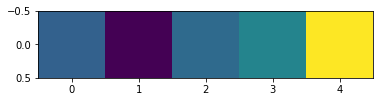

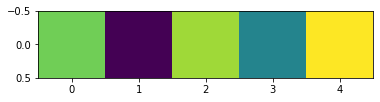

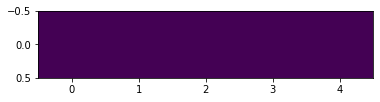

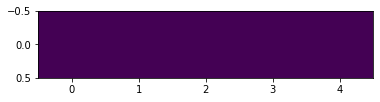

In [ ]:
import cv2
plt.imshow(z[0:1])
plt.show()
a=np.asarray([255.0,255.0,255.0,255.0,255.0]).reshape(1,5)
b=np.asarray([0.0,0.0,0.0,0.0,0.0]).reshape(1,5)
h=cv2.bitwise_and(f,a)
plt.imshow(h)
plt.show()
plt.imshow(a)
plt.show()
plt.imshow(b)
plt.show()

In [ ]:
f=z[0:1]
f

array([[0.77493874, 0.26752452, 0.83504903, 1.00335693, 1.90374756]])

In [ ]:
a.shape

(1, 5)

In [ ]:
type(a)

numpy.ndarray

In [ ]:
type(z[0:1])

numpy.ndarray

In [ ]:
f

array([[0.77493874, 0.26752452, 0.83504903, 1.00335693, 1.90374756]])

In [ ]:
a

array([[255, 255, 255, 255, 255]])

In [ ]:
p=[1.01,2.01]
np.floor(p[0:2])

array([1., 2.])

In [ ]:
idx[0:10]

array([[26, 26, 26, ..., 64, 64, 64],
       [26, 26, 26, ..., 64, 64, 64],
       [26, 26, 26, ..., 64, 64, 64],
       ...,
       [26, 26, 26, ..., 64, 64, 64],
       [26, 26, 26, ..., 64, 64, 64],
       [26, 26, 26, ..., 64, 64, 64]])